In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random 
import numpy as np

In [3]:
dff = pd.read_csv('baseball.csv')

In [4]:
dff

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


- Column Descriptions:
- Team        : Team abbreviation (e.g., BOS, NYY, ARI)
- League      : League of the team (AL = American League, NL = National League)
- Year        : Season year
- RS          : Runs Scored by the team in the season
- RA          : Runs Allowed by the team in the season
- W           : Total wins in the season (target variable)
- OBP         : On-Base Percentage (how often players reach base)
- SLG         : Slugging Percentage (power-hitting ability)
- BA          : Batting Average
- Playoffs    : Playoff qualification (1 = qualified, 0 = not qualified)
- RankSeason  : Team rank at the end of the regular season
- RankPlayoffs: Team rank in the playoffs (NaN if not qualified)
- G           : Total games played in the season
- OOBP        : Opponent On-Base Percentage (defensive effectiveness)
- OSLG        : Opponent Slugging Percentage (opponent power hitting)


In [5]:
df = dff.copy()

In [6]:
df.shape

(1232, 15)

In [7]:
df.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [8]:
# for rank season and rank playoffs, missing means not qualified. 
# If a column is an outcome, ranking, or decision made AFTER the target → DROP IT (target: wins)
# RankSeason and RankPlayoffs were removed as they are post-season outcome variables derived from wins, and including them would introduce target leakage.

df = df.drop(columns = ['RankSeason', 'RankPlayoffs'])

In [9]:
# oobp, oslg can be filled using mean.
df['OOBP'] = df.groupby('League')['OOBP'].transform(lambda x: x.fillna(x.mean()))
df['OSLG'] = df.groupby('League')['OSLG'].transform(lambda x: x.fillna(x.mean()))

In [10]:
df.isnull().sum() 

Team        0
League      0
Year        0
RS          0
RA          0
W           0
OBP         0
SLG         0
BA          0
Playoffs    0
G           0
OOBP        0
OSLG        0
dtype: int64

In [11]:
df.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,161.918831,0.332311,0.419951
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,0.624365,0.008942,0.015674
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,162.000000,0.331612,0.416826
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,162.000000,0.333000,0.422000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,162.000000,0.333010,0.423077
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,165.000000,0.384000,0.499000


In [12]:
df = df.drop(columns = ['Team']) 
# League was retained as a binary categorical variable because it represents a structural difference in playing conditions, unlike team identity which is purely nominal.

In [13]:
df.head()

,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
0,NL,2012,734,688,81,0.328,0.418,0.259,0,162,0.317,0.415
1,NL,2012,700,600,94,0.320,0.389,0.247,1,162,0.306,0.378
2,AL,2012,712,705,93,0.311,0.417,0.247,1,162,0.315,0.403
3,AL,2012,734,806,69,0.315,0.415,0.260,0,162,0.331,0.428
4,NL,2012,613,759,61,0.302,0.378,0.240,0,162,0.335,0.424


In [14]:
import seaborn as sns

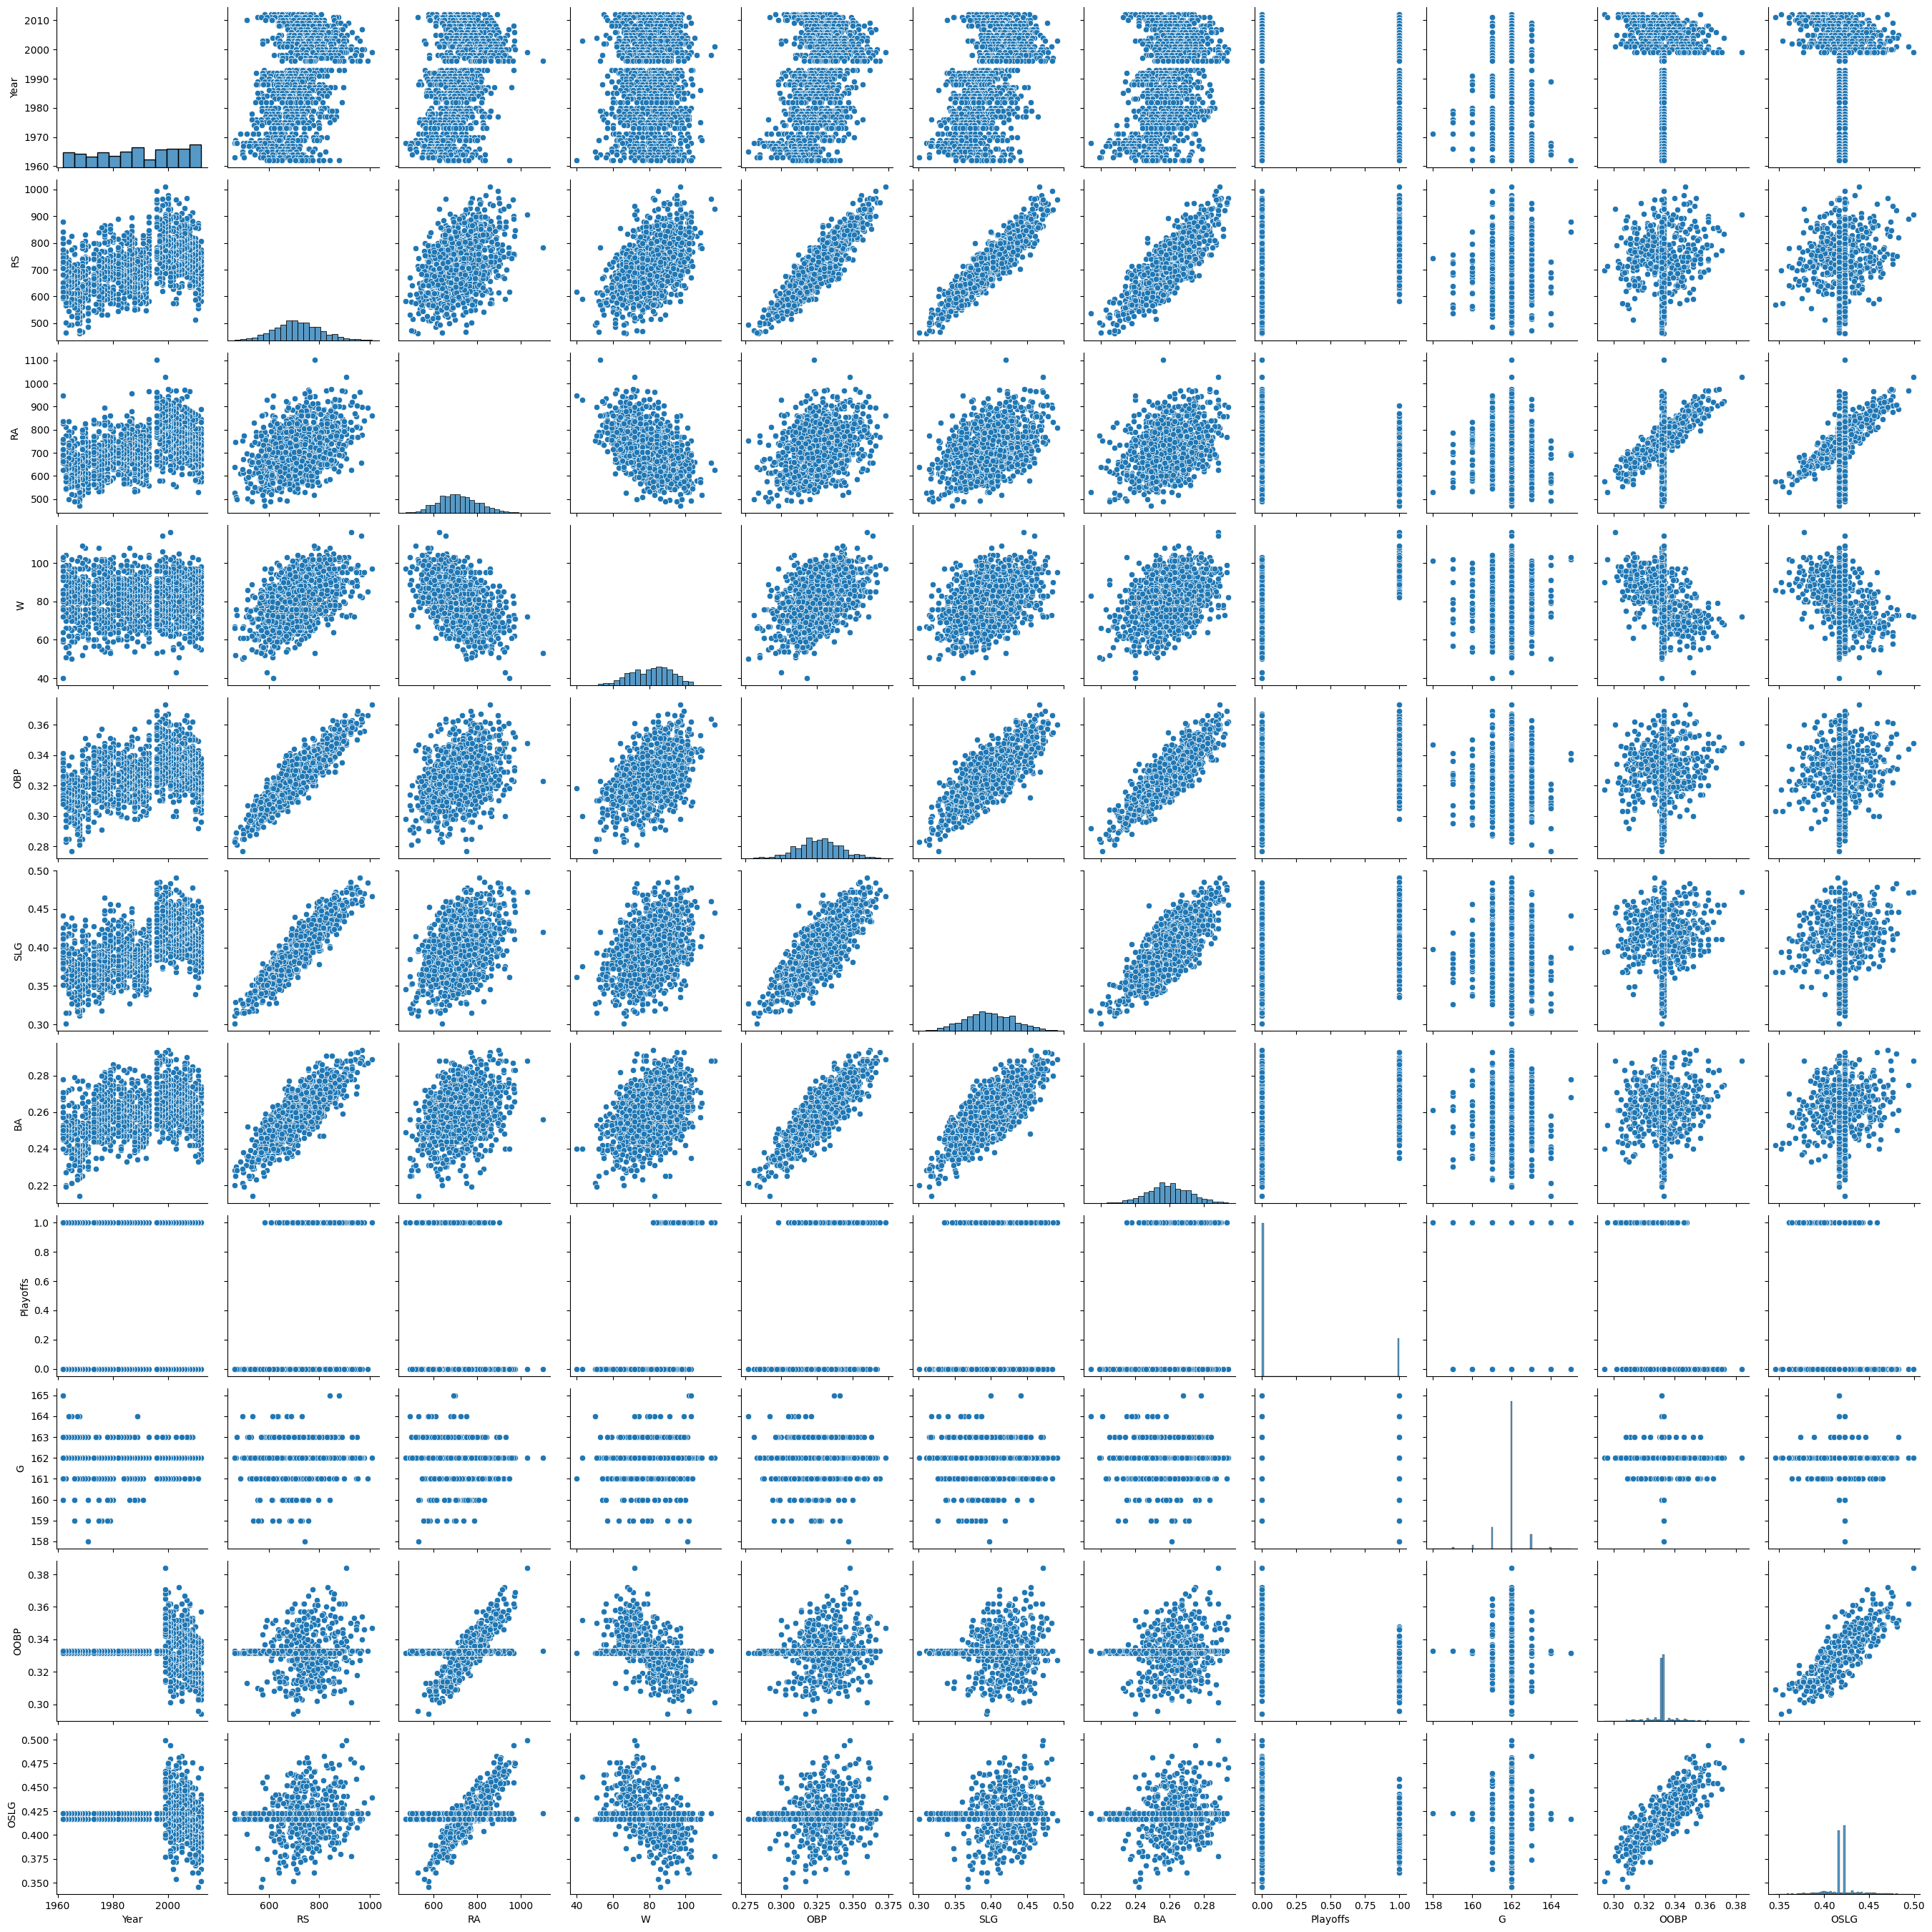

In [15]:
sns.pairplot(data = df)

In [16]:
df  

,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
0,NL,2012,734,688,81,0.328,0.418,0.259,0,162,0.317000,0.415000
1,NL,2012,700,600,94,0.320,0.389,0.247,1,162,0.306000,0.378000
2,AL,2012,712,705,93,0.311,0.417,0.247,1,162,0.315000,0.403000
3,AL,2012,734,806,69,0.315,0.415,0.260,0,162,0.331000,0.428000
4,NL,2012,613,759,61,0.302,0.378,0.240,0,162,0.335000,0.424000
...,...,...,...,...,...,...,...,...,...,...,...,...
1227,NL,1962,705,759,81,0.330,0.390,0.260,0,161,0.331612,0.416826
1228,NL,1962,706,626,93,0.321,0.394,0.268,0,161,0.331612,0.416826
1229,NL,1962,878,690,103,0.341,0.441,0.278,1,165,0.331612,0.416826
1230,NL,1962,774,664,84,0.335,0.394,0.271,0,163,0.331612,0.416826


In [17]:
df['League'].unique()

array(['NL', 'AL'], dtype=object)

In [18]:
df_encoded = pd.get_dummies(df, columns=['League'], drop_first=True)

In [ ]:
df_encoded.head()   # nl true, al false. we didnt use label encoder here bcoz it may consider higher priority to a particular league.

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,League_NL
0,2012,734,688,81,0.328,0.418,0.259,0,162,0.317,0.415,True
1,2012,700,600,94,0.320,0.389,0.247,1,162,0.306,0.378,True
2,2012,712,705,93,0.311,0.417,0.247,1,162,0.315,0.403,False
3,2012,734,806,69,0.315,0.415,0.260,0,162,0.331,0.428,False
4,2012,613,759,61,0.302,0.378,0.240,0,162,0.335,0.424,True


In [20]:
# playoffs depend on wins. so drop them, we cant include them in independent variables. dependent var is wins.
df_encoded = df_encoded.drop(columns=['Playoffs'])

In [22]:
X = df_encoded[['Year', 'RS', 'RA', 'OBP', 'SLG', 'BA', 'G', 'OOBP', 'OSLG', 'League_NL']]
y = df_encoded['W']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [27]:
import pandas as pd
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coeff_df

,Feature,Coefficient
0,Year,-0.006430
1,RS,0.091628
2,RA,-0.105225
3,OBP,69.392975
4,SLG,18.867186
5,BA,-24.984205
6,G,0.492046
7,OOBP,-46.096748
8,OSLG,14.784456
9,League_NL,-0.350480


In [28]:
y_pred = model.predict(X_test)

In [34]:
df_pred = pd.DataFrame({
    'y_actual': y_test,
    'y_predicted': y_pred
})

In [35]:
df_pred['error'] = df_pred['y_actual']-df_pred['y_predicted']
df_pred['absolute_error'] = abs(df_pred['error'])
mean_absolute_error = df_pred['absolute_error'].mean()
mean_absolute_error

np.float64(3.2271459298133456)

In [36]:
df_pred

,y_actual,y_predicted,error,absolute_error
549,72,74.886962,-2.886962,2.886962
1050,102,90.911933,11.088067,11.088067
244,98,100.374292,-2.374292,2.374292
553,96,90.810695,5.189305,5.189305
1165,50,53.874855,-3.874855,3.874855
...,...,...,...,...
273,71,72.314922,-1.314922,1.314922
427,77,79.756191,-2.756191,2.756191
362,95,91.352626,3.647374,3.647374
237,79,80.492225,-1.492225,1.492225


In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
r2score = r2_score(y_test, y_pred)
print(f"Variance in wins: {round(r2score, 4)*100}")
# variance in wins is 87.92%, which means the model is good.

Variance in wins: 87.92999999999999


In [40]:
print(f"Mean absolute error: {round(mean_absolute_error(y_test, y_pred), 2)}")

Mean absolute error: 3.23


In [41]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

Mean squared error: 16.293073549332153


In [ ]:
# predicting using the data provided by user.
league = input("Enter League (AL or NL): ")
league = league.upper()
if league not in ['AL', 'NL']:
    raise ValueError("League must be AL or NL")
rs = float(input("Enter Runs Scored (RS): "))
ra = float(input("Enter Runs Allowed (RA): "))
obp = float(input("Enter OBP: "))
slg = float(input("Enter SLG: "))
ba = float(input("Enter Batting Average (BA): "))
oobp = float(input("Enter Opponent OBP (OOBP): "))
oslg = float(input("Enter Opponent SLG (OSLG): "))


In [46]:
import pandas as pd

user_data = pd.DataFrame({
    'League': [league],
    'RS': [rs],
    'RA': [ra],
    'OBP': [obp],
    'SLG': [slg],
    'BA': [ba],
    'OOBP': [oobp],
    'OSLG': [oslg]
})
user_data

,League,RS,RA,OBP,SLG,BA,OOBP,OSLG
0,NL,750.0,700.0,0.33,0.42,0.26,0.32,0.41


In [47]:
user_encoded = pd.get_dummies(user_data, columns=['League'], drop_first=True)

In [48]:
user_encoded = user_encoded.reindex(columns=X.columns, fill_value=0)

In [49]:
predicted_wins = model.predict(user_encoded)
print(f"Predicted Wins: {predicted_wins[0]:.0f}")

Predicted Wins: 20
